# Ciência de Dados para Negócios III - Trabalho 4 - Classificadores Estatísticos

**Aluno**: Antônio Arthur Silva de Lima

**Matrícula**: 508492

**Professor**: Victor Aguiar Evangelista de Farias

**Data**: 09/11/2025

In [1]:
# bibliotecas

## numerical and plots
import numpy as np
import matplotlib.pyplot as plt

## processing and sampling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

## Metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.inspection import DecisionBoundaryDisplay

# Experimento I

## Contexto

O dataset contém informações sobre os pagamentos de cartões de crédito de clientes taiwaneses entre abril e setembro de 2005, contendo ao todo 25 variáveis.

A variável de interesse no estudo se chama *default.payment.next.month*, e é uma variável binária, de valor 0 ou 1, que indica o pagamento regular ou não realizado pelos clientes. Nesse caso, 1 indica pagamento regular, e 0 indica o não pagamento, i.e. um calote.

O objetivo da atividade é testar algoritmos capazes de prever se determinado cliente é ou não caloteiro baseado nas variáveis explicativas contidas no conjunto de dados.

Primeiro, iremos ajustar uma **Regressão Logística**. Após, testaremos o método **Naive Bayes Gaussiano**. Por fim, iremos trabalhar com uma **Análise Discriminante Quadrática**.

## Carregando o dado

In [2]:
df = np.loadtxt('default_of_credit_card_clients.csv', delimiter=',', skiprows=1)
X = df[:, 1:-1]
y = df[:, -1]

## Split dos dados

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=508482)

## Pré-processamento

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Treinamento

In [5]:
lr_model = LogisticRegression(penalty=None, random_state=508492)
lr_model.fit(X_train, y_train)
y_hat_lr = lr_model.predict(X_test)

## Avaliação

In [6]:
acuracia = accuracy_score(y_test, y_hat_lr)
precision = precision_score(y_test, y_hat_lr)
recall = recall_score(y_test, y_hat_lr)
f1 = f1_score(y_test, y_hat_lr)

cm = confusion_matrix(y_test, y_hat_lr)
tn, fp, fn, tp = cm.ravel()
specificity = tn/(tn+fp)

print(f'Medidas de qualidade do ajuste (Regressão Logística):\n')
print(f'Acurácia: {acuracia:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Sensibilidade: {recall:.4f}')
print(f'Especificidade: {specificity:.4f}')
print(f'F1: {f1:.4f}')

Medidas de qualidade do ajuste (Regressão Logística):

Acurácia: 0.8144
Precisão: 0.7309
Sensibilidade: 0.2389
Especificidade: 0.9754
F1: 0.3602


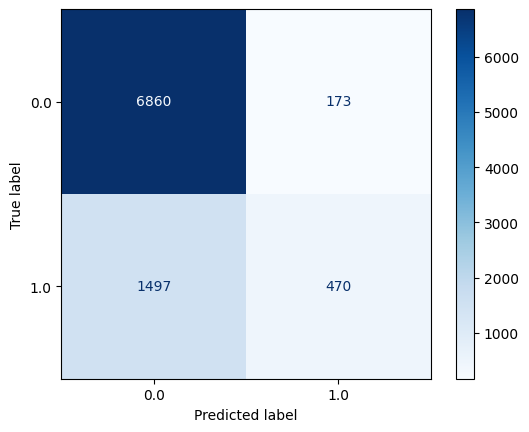

In [7]:
ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test, cmap='Blues')
plt.show()

## Conclusão

- Acuracidade consideravelmente alta, indicando **boa generalização** do modelo;

- **Baixa sensibilidade**, ou seja, dentre os bons pagadores, o modelo identifica que apenas 23,89% de fato o são;

- **Alta especificidade**, ou seja, dentre os caloteiros, o modelo identifica que 97,54% de fato o são;

- **Boa precisão**, ou seja, dentre os previstos como bons pagadores pelo modelo, 73,09% de fato o são;

- **Baixo Score F1**, indicando o forte viés que o modelo possui para uma das "direções" da classificação, que nesse caso é a classe de caloteiros.

*Reflexão*:

No contexto analisado, é mais crítico classificar um bom pagador como caloteiro ou classificar um caloteiro como bom pagador?

Na primeira situação, o banco/prestadora do serviço pode perder clientes, pois estes podem abandonar a instituição por falta de credibilidade.

Na segunda situação, o banco/prestadora do serviço mantém seus clientes, porém arcará com os custos de manter caloteiros.

Assim, cabe à instituição julgar qual dos pontos elencados é o mais crítico, ficando então à cargo do cientista de dados adequar os modelos à necessidade da empresa.

# Experimento II

In [8]:
# ajuste
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# predição
y_hat_gnb = gnb_model.predict(X_test)

# qualidade do ajuste
acuracia_gnb = accuracy_score(y_test, y_hat_gnb)
precision_gnb = precision_score(y_test, y_hat_gnb)
recall_gnb = recall_score(y_test, y_hat_gnb)
f1_gnb = f1_score(y_test, y_hat_gnb)

cm_gnb = confusion_matrix(y_test, y_hat_gnb)
tn_gnb, fp_gnb, fn_gnb, tp_gnb = cm_gnb.ravel()
specificity_gnb = tn_gnb/(tn_gnb+fp_gnb)

print(f'Medidas de qualidade do ajuste (Naive Bayes Gaussiano):\n')
print(f'Acurácia: {acuracia_gnb:.4f}')
print(f'Precisão: {precision_gnb:.4f}')
print(f'Sensibilidade: {recall_gnb:.4f}')
print(f'Especificidade: {specificity_gnb:.4f}')
print(f'F1: {f1_gnb:.4f}')

Medidas de qualidade do ajuste (Naive Bayes Gaussiano):

Acurácia: 0.7558
Precisão: 0.4565
Sensibilidade: 0.6157
Especificidade: 0.7950
F1: 0.5242


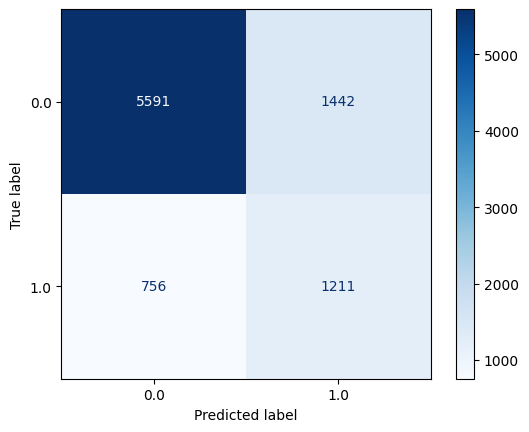

In [9]:
ConfusionMatrixDisplay.from_estimator(gnb_model, X_test, y_test, cmap='Blues')
plt.show()

## Conclusão

- O algoritmo reduz a sua generalização de prever corretamente a classificação real de um cliente, em relação à Regressão Logística;

- A especificidade também reduz, apesar de continuar relativamente alta;

- O modelo melhora grandemente a sensibilidade, ou seja, classifica mais corretamente bons pagadores que de fato o são;

- A precisão reduz, ficando relativamente ruim;

- A métrica F1 melhora levemente, indicando um modelo balanceado em comparação ao anterior.

# Experimento III

In [11]:
# ajuste
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

# predição
y_hat_qda = qda_model.predict(X_test)

# qualidade do ajuste
acuracia_qda = accuracy_score(y_test, y_hat_qda)
precision_qda = precision_score(y_test, y_hat_qda)
recall_qda = recall_score(y_test, y_hat_qda)
f1_qda = f1_score(y_test, y_hat_qda)

cm_qda = confusion_matrix(y_test, y_hat_qda)
tn_qda, fp_qda, fn_qda, tp_qda = cm_qda.ravel()
specificity_qda = tn_qda/(tn_qda+fp_qda)

print('Medidas de qualidade do ajuste (Análise Discriminante Quadrática):\n')
print(f'Acurácia: {acuracia_qda:.4f}')
print(f'Precisão: {precision_qda:.4f}')
print(f'Sensibilidade: {recall_qda:.4f}')
print(f'Especificidade: {specificity_qda:.4f}')
print(f'F1: {f1_qda:.4f}')

Medidas de qualidade do ajuste (Análise Discriminante Quadrática):

Acurácia: 0.5371
Precisão: 0.2960
Sensibilidade: 0.8114
Especificidade: 0.4604
F1: 0.4338


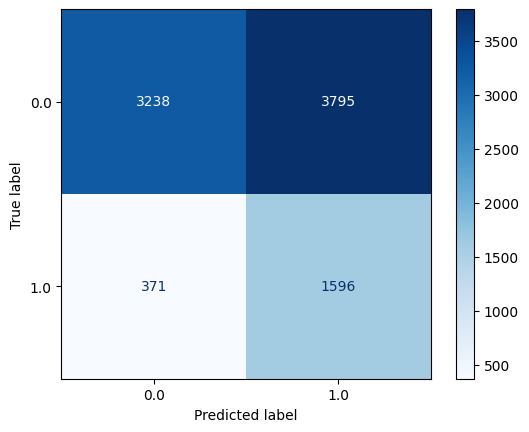

In [12]:
ConfusionMatrixDisplay.from_estimator(qda_model, X_test, y_test, cmap='Blues')
plt.show()

## Conclusão

- O algoritmo reduz ainda mais sua capacidade de generalizar a classificação correta de um cliente, em relação aos algoritmos anteriores;

- A especificidade foi a menor dentre os modelos, indicando baixa taxa de acertos de caloteiros;

- O modelo teve prevalência na sensibilidade, ou seja, dentre os não caloteiros, o modelo aponta corretamente que 81,14% o são;

- A precisão também reduz, isto é, dentre os preditos como bons pagadores, apenas 29,6% o são de fato;

- A métrica F1 também é baixa, indicando um modelo ainda desbalanceado na separação correta das classes.

# Experimento IV

## Carregando o dado

In [13]:
df2 = np.loadtxt('artificial2d.csv', delimiter=',')
X2 = df2[:, :-1]
y2 = df2[:, -1]

## Split dos dados

In [14]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=508492)

## Pré Processamento

In [15]:
scaler2 = StandardScaler()
X2_train = scaler2.fit_transform(X2_train)
X2_test = scaler2.transform(X2_test)

## Treinamento

In [16]:
# ML algorithms
m1 = LogisticRegression(penalty=None, random_state=508492)
m2 = GaussianNB()
m3 = QuadraticDiscriminantAnalysis()

# fit
m1.fit(X2_train, y2_train)
m2.fit(X2_train, y2_train)
m3.fit(X2_train, y2_train)

# predict
y_hat_m1 = m1.predict(X2_test)
y_hat_m2 = m2.predict(X2_test)
y_hat_m3 = m3.predict(X2_test)

## Avaliação

In [17]:
models_predictions = [y_hat_m1, y_hat_m2, y_hat_m3]
models = ['Regressão Logística', 'Naive Bayes Gaussiano', 'Análise Discriminante Quadrática']

for i in range(3):
  print('\n==================================================================\n')
  ac = accuracy_score(y2_test, models_predictions[i])
  pr = precision_score(y2_test, models_predictions[i])
  re = recall_score(y2_test, models_predictions[i])
  f1 = f1_score(y2_test, models_predictions[i])

  cm = confusion_matrix(y2_test, models_predictions[i])
  tn, fp, fn, tp = cm.ravel()
  sp = tn/(tn+fp)

  print(f'Medidas de qualidade do ajuste ({models[i]}):\n')
  print(f'Acurácia: {ac:.4f}')
  print(f'Precisão: {pr:.4f}')
  print(f'Sensibilidade: {re:.4f}')
  print(f'Especificidade: {sp:.4f}')
  print(f'F1: {f1:.4f}')





Medidas de qualidade do ajuste (Regressão Logística):

Acurácia: 0.9000
Precisão: 0.9500
Sensibilidade: 0.9048
Especificidade: 0.8889
F1: 0.9268


Medidas de qualidade do ajuste (Naive Bayes Gaussiano):

Acurácia: 0.8667
Precisão: 1.0000
Sensibilidade: 0.8095
Especificidade: 1.0000
F1: 0.8947


Medidas de qualidade do ajuste (Análise Discriminante Quadrática):

Acurácia: 0.9000
Precisão: 1.0000
Sensibilidade: 0.8571
Especificidade: 1.0000
F1: 0.9231


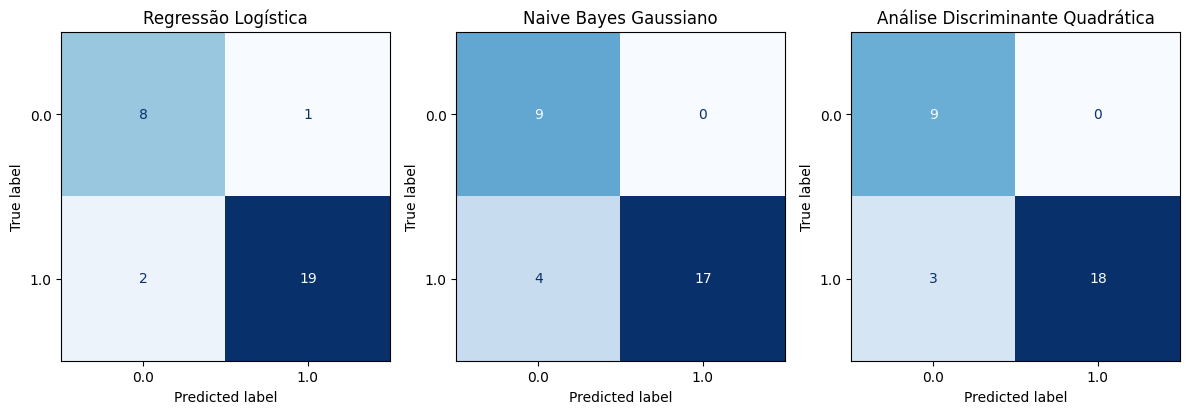

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

for m_model, ax, title in zip([m1, m2, m3], axes, models):
  cm = ConfusionMatrixDisplay.from_estimator(m_model, X2_test, y2_test, ax=ax, cmap='Blues', colorbar=False)
  ax.set_title(title)

plt.tight_layout()
plt.show()

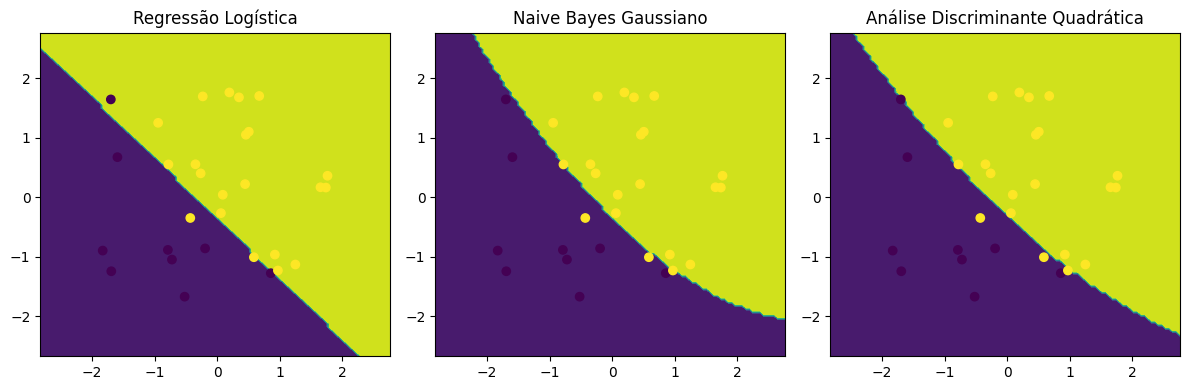

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

for m_model, ax, title in zip([m1, m2, m3], axes, models):

  DecisionBoundaryDisplay.from_estimator(m_model, X2_test, response_method = 'predict', ax=ax)

  ax.scatter(X2_test[:, 0], X2_test[:, 1], c=y2_test)
  ax.set_title(title)


plt.tight_layout()
plt.show()
